# The Sparks Foundation

## Shubham Shinde
#### Data Science and Business Analatics Intern

### GRIPSEPTEMBER21

### #Task 2

### Problem Statement
from the given iris dataset predict the optimum number of cluster and represent it visually

In [1]:
##Importing necessary Packages/Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

In [2]:
## Importing File
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Checking Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
## Value counts of targeted column
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### Exploratory Data Analysis

In [7]:
## Checking Missing values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No missing values present in our dataset.

In [8]:
## Checking Duplicate values
df.duplicated().sum()

1

only one dulicated value present in our dataset.we keep this value as it is because it wont affect our data in high amount.

<AxesSubplot:>

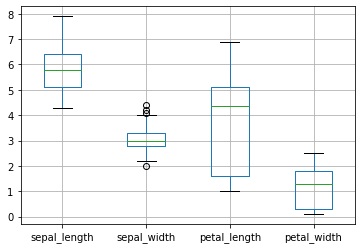

In [9]:
## Checking Outliers By using boxplot
df.boxplot()

very less number of outliers are present in out data set.

In [10]:
## Label Encoding on Targeted column

le=LabelEncoder()
df['Label']=df[['species']].apply(le.fit_transform)
df

,sepal_length,sepal_width,petal_length,petal_width,species,Label
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


### PCA for data decomposition

In [11]:
x=df.drop(columns=['species','Label'])

In [12]:
## PCA
pca=PCA(n_components=2)
PCA_iris=pca.fit_transform(x)

In [13]:
PCA_iris

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [14]:
P=pd.DataFrame(PCA_iris)
P.head()

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


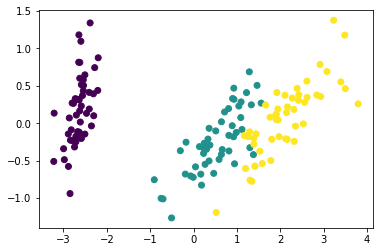

In [15]:
plt.scatter(PCA_iris[:,0],PCA_iris[:,1],c=df.Label)

## 1.KMeans Clustering

### Elbow plot

###### Inertia: It is the sum of squared distances of samples to their closest cluster center.

We iterate the values of k from 1 to 10 using for loop and calculated the values of inertia for each value of k.

F:\Installed\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Cluster vs Inertia')

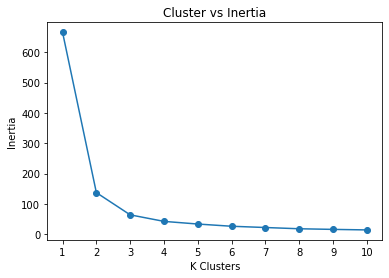

In [16]:
## Function to get elbow plot
k=range(1,11)
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(P)
    ssd.append(model.inertia_)

plt.plot(k,ssd,marker='o')
plt.xlabel('K Clusters')
plt.ylabel('Inertia')
plt.xticks(k)
plt.title('Cluster vs Inertia')
    

To get the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

Selecting 3 as optimal cluster value.

In [17]:
## Model Fiting 
model=KMeans(n_clusters=3)
model.fit(P)

KMeans(n_clusters=3)

In [18]:
##  Model Labels
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [19]:
P1=P
P1['species']=df['Label']
P1['cluster_1']=model.labels_
P1

,0,1,species,cluster_1
0,-2.684126,0.319397,0,0
1,-2.714142,-0.177001,0,0
2,-2.888991,-0.144949,0,0
3,-2.745343,-0.318299,0,0
4,-2.728717,0.326755,0,0
...,...,...,...,...
145,1.944110,0.187532,2,1
146,1.527167,-0.375317,2,2
147,1.764346,0.078859,2,1
148,1.900942,0.116628,2,1


In [20]:
##centroid
centroid=model.cluster_centers_
centroid

array([[-2.64241546,  0.19088505],
       [ 2.34652659,  0.27393856],
       [ 0.66567601, -0.3316042 ]])

In [21]:
model.n_iter_

7

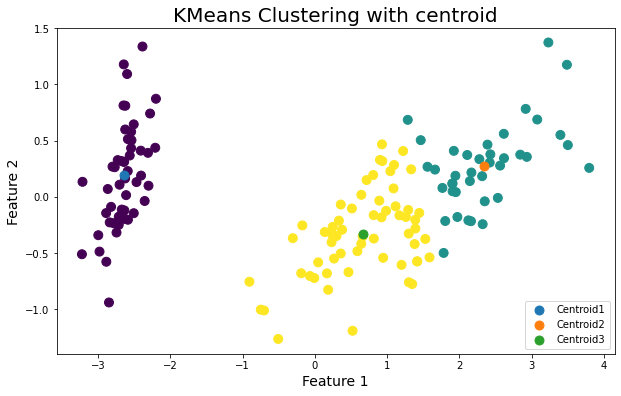

In [22]:
## Model Label Ploting with centroid
plt.figure(figsize=(10,6))
plt.scatter(P.iloc[:,0],P.iloc[:,1],c=model.labels_,s=80)
for i in range(len(centroid)):
    plt.scatter(centroid[i][0],centroid[i][1],label='Centroid'+str(i+1),s=80)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.title('KMeans Clustering with centroid',fontsize=20)
plt.legend()    

## 2.Hierarchical Agglomeritive Clustering

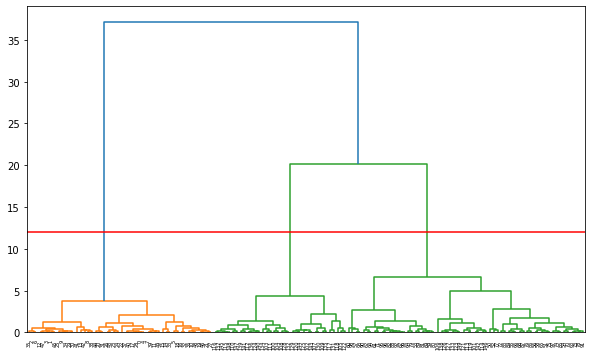

In [30]:
## Dendrograph to decide the n_cluster value
from scipy.cluster import hierarchy
plt.figure(figsize=(10,6))
den=hierarchy.dendrogram(hierarchy.linkage(P,method='ward'))
plt.axhline(y=12,color='r')

3 is consider as optimal k value.

In [24]:
# Model Fitting
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=3)
model.fit(P)

AgglomerativeClustering(n_clusters=3)

In [25]:
# model labels
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [26]:
P1['cluster_2']=model.labels_
P1

,0,1,species,cluster_1,cluster_2
0,-2.684126,0.319397,0,0,1
1,-2.714142,-0.177001,0,0,1
2,-2.888991,-0.144949,0,0,1
3,-2.745343,-0.318299,0,0,1
4,-2.728717,0.326755,0,0,1
...,...,...,...,...,...
145,1.944110,0.187532,2,1,2
146,1.527167,-0.375317,2,2,0
147,1.764346,0.078859,2,1,2
148,1.900942,0.116628,2,1,2


Text(0, 0.5, 'Feature 2')

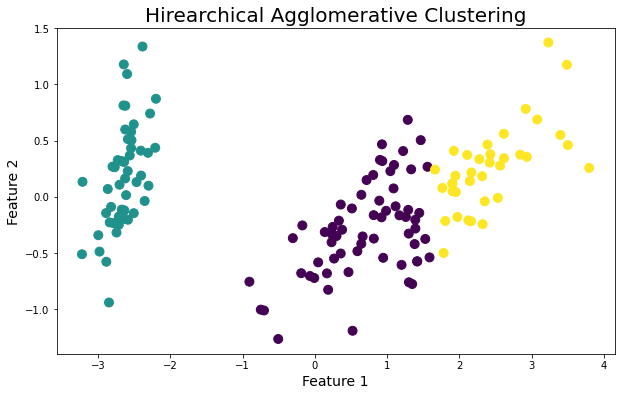

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(P[0],P[1],c=model.labels_,s=80)
plt.title('Hirearchical Agglomerative Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)

## Final Cluster values comparison 
    cluster_1= Kmeanslabels
    cluster_2=Hierarchical Agglomeretive Labels
    label=original data species labels

In [28]:
P

,0,1,species,cluster_1,cluster_2
0,-2.684126,0.319397,0,0,1
1,-2.714142,-0.177001,0,0,1
2,-2.888991,-0.144949,0,0,1
3,-2.745343,-0.318299,0,0,1
4,-2.728717,0.326755,0,0,1
...,...,...,...,...,...
145,1.944110,0.187532,2,1,2
146,1.527167,-0.375317,2,2,0
147,1.764346,0.078859,2,1,2
148,1.900942,0.116628,2,1,2


Kmeans and Hierarchical Agglomeritive Clustering models predict the best cluster values as species are belongs to same cluster group in each model.

In [29]:
print(np.array(P['species']))
print(np.array(P['cluster_1']))
print(np.array(P['cluster_2']))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
